In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

In [2]:
root = './distilled_dataset'

### CIFAR10 Distilled

In [3]:
class CIFAR10_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [4]:
index_file = pd.read_csv('./CIFAR10_DM_index_files/ipc500_idx.csv')
index_file

,image_path,label
0,./CIFAR10_DM/ipc500/airplane/003746e7-c915-4d7...,0
1,./CIFAR10_DM/ipc500/airplane/0090a052-69a0-461...,0
2,./CIFAR10_DM/ipc500/airplane/0143960d-3978-448...,0
3,./CIFAR10_DM/ipc500/airplane/01ee79d8-a8fe-430...,0
4,./CIFAR10_DM/ipc500/airplane/0231edfd-42fd-477...,0
...,...,...
4995,./CIFAR10_DM/ipc500/truck/fb1fbeaf-b6c7-4da4-a...,9
4996,./CIFAR10_DM/ipc500/truck/fcd9e0b0-9b62-4d41-8...,9
4997,./CIFAR10_DM/ipc500/truck/fdefdd6d-2fd9-42f1-b...,9
4998,./CIFAR10_DM/ipc500/truck/ff83d309-da9a-459a-a...,9


In [5]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              ])
cifar10_distilled_train = CIFAR10_Distilled(index_file, transform)

cifar10_root = '../cifar10'
cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [6]:
batch_size = 16 # cut batch size to half for ipc50
train_data_loader, test_data_loader = get_data_loaders(cifar10_distilled_train, cifar10_test, batch_size=batch_size)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [8]:
model_name = 'alexnet'
dataset = 'cifar10_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
model = torchvision.models.alexnet(num_classes=10).to(device)

In [9]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 313/313 [00:39<00:00,  7.86it/s, loss=2.26]


epoch: 1 done, loss: 0.14377710223197937
Acc: 0.1062
[0.001]


Epoch 2: 100%|██████████| 313/313 [00:07<00:00, 42.00it/s, loss=1.54]


epoch: 2 done, loss: 0.12667906284332275
Acc: 0.2409
[0.001]


Epoch 3: 100%|██████████| 313/313 [00:09<00:00, 33.88it/s, loss=1.72] 


epoch: 3 done, loss: 0.09151418507099152
Acc: 0.3128
[0.001]


Epoch 4: 100%|██████████| 313/313 [00:11<00:00, 27.71it/s, loss=0.552]


epoch: 4 done, loss: 0.07363490760326385
Acc: 0.3241
[0.001]


Epoch 5: 100%|██████████| 313/313 [00:11<00:00, 26.64it/s, loss=0.887]


epoch: 5 done, loss: 0.060523394495248795
Acc: 0.3581
[0.001]


Epoch 6: 100%|██████████| 313/313 [00:13<00:00, 23.75it/s, loss=1.37] 


epoch: 6 done, loss: 0.049007635563611984
Acc: 0.4012
[0.001]


Epoch 7: 100%|██████████| 313/313 [00:15<00:00, 19.59it/s, loss=0.326]


epoch: 7 done, loss: 0.0401422418653965
Acc: 0.4312
[0.001]


Epoch 8: 100%|██████████| 313/313 [00:14<00:00, 21.07it/s, loss=0.178]


epoch: 8 done, loss: 0.03295512869954109
Acc: 0.4463
[0.001]


Epoch 9: 100%|██████████| 313/313 [00:15<00:00, 20.15it/s, loss=1.06]  


epoch: 9 done, loss: 0.029864797368645668
Acc: 0.4774
[0.001]


Epoch 10: 100%|██████████| 313/313 [00:13<00:00, 23.88it/s, loss=0.171] 


epoch: 10 done, loss: 0.024376241490244865
Acc: 0.4828
[0.001]


Epoch 11: 100%|██████████| 313/313 [00:15<00:00, 20.19it/s, loss=0.185] 


epoch: 11 done, loss: 0.020223574712872505
Acc: 0.4927
[0.001]


Epoch 12: 100%|██████████| 313/313 [00:15<00:00, 20.74it/s, loss=0.12]  


epoch: 12 done, loss: 0.01881142146885395
Acc: 0.486
[0.001]


Epoch 13: 100%|██████████| 313/313 [00:15<00:00, 20.68it/s, loss=0.72]  


epoch: 13 done, loss: 0.016137495636940002
Acc: 0.4995
[0.001]


Epoch 14: 100%|██████████| 313/313 [00:14<00:00, 21.75it/s, loss=0.0349] 


epoch: 14 done, loss: 0.013762244954705238
Acc: 0.488
[0.001]


Epoch 15: 100%|██████████| 313/313 [00:14<00:00, 21.09it/s, loss=0.0283]


epoch: 15 done, loss: 0.011936086229979992
Acc: 0.5238
[0.001]


Epoch 16: 100%|██████████| 313/313 [00:15<00:00, 19.76it/s, loss=0.451] 


epoch: 16 done, loss: 0.010763212107121944
Acc: 0.5356
[0.001]


Epoch 17: 100%|██████████| 313/313 [00:14<00:00, 21.46it/s, loss=0.273]  


epoch: 17 done, loss: 0.010046010836958885
Acc: 0.5321
[0.001]


Epoch 18: 100%|██████████| 313/313 [00:12<00:00, 24.77it/s, loss=0.00555]


epoch: 18 done, loss: 0.009020285680890083
Acc: 0.5393
[0.001]


Epoch 19: 100%|██████████| 313/313 [00:11<00:00, 28.10it/s, loss=0.0788]  


epoch: 19 done, loss: 0.008460737764835358
Acc: 0.5338
[0.001]


Epoch 20: 100%|██████████| 313/313 [00:10<00:00, 28.84it/s, loss=0.328]  


epoch: 20 done, loss: 0.007299117278307676
Acc: 0.5466
[0.001]


Epoch 21: 100%|██████████| 313/313 [00:13<00:00, 23.80it/s, loss=0.0254]  


epoch: 21 done, loss: 0.005800372920930386
Acc: 0.5198
[0.001]


Epoch 22: 100%|██████████| 313/313 [00:13<00:00, 22.70it/s, loss=0.0139] 


epoch: 22 done, loss: 0.007206612266600132
Acc: 0.5394
[0.001]


Epoch 23: 100%|██████████| 313/313 [00:12<00:00, 24.65it/s, loss=0.00177] 


epoch: 23 done, loss: 0.0055326432920992374
Acc: 0.5508
[0.001]


Epoch 24: 100%|██████████| 313/313 [00:12<00:00, 24.27it/s, loss=0.0652]  


epoch: 24 done, loss: 0.0052515617571771145
Acc: 0.5456
[0.001]


Epoch 25: 100%|██████████| 313/313 [00:13<00:00, 23.95it/s, loss=0.0464]  


epoch: 25 done, loss: 0.004782770294696093
Acc: 0.5499
[0.001]


Epoch 26: 100%|██████████| 313/313 [00:12<00:00, 24.10it/s, loss=0.000343]


epoch: 26 done, loss: 0.004322834778577089
Acc: 0.541
[0.001]


Epoch 27: 100%|██████████| 313/313 [00:12<00:00, 24.25it/s, loss=0.326]   


epoch: 27 done, loss: 0.0034020289313048124
Acc: 0.5433
[0.001]


Epoch 28: 100%|██████████| 313/313 [00:12<00:00, 24.51it/s, loss=0.0088]  


epoch: 28 done, loss: 0.003368464997038245
Acc: 0.5685
[0.001]


Epoch 29: 100%|██████████| 313/313 [00:13<00:00, 23.81it/s, loss=0.0217]  


epoch: 29 done, loss: 0.003211423521861434
Acc: 0.5647
[0.001]


Epoch 30: 100%|██████████| 313/313 [00:13<00:00, 23.62it/s, loss=0.0664]  


epoch: 30 done, loss: 0.003965926822274923
Acc: 0.5745
[0.001]


Epoch 31: 100%|██████████| 313/313 [00:13<00:00, 24.01it/s, loss=0.0123]  


epoch: 31 done, loss: 0.003428330412134528
Acc: 0.551
[0.001]


Epoch 32: 100%|██████████| 313/313 [00:13<00:00, 23.90it/s, loss=5.39e-5] 


epoch: 32 done, loss: 0.0022818895522505045
Acc: 0.5755
[0.001]


Epoch 33: 100%|██████████| 313/313 [00:13<00:00, 23.68it/s, loss=3.65e-5] 


epoch: 33 done, loss: 0.001962423324584961
Acc: 0.5583
[0.001]


Epoch 34: 100%|██████████| 313/313 [00:13<00:00, 23.75it/s, loss=0.00211] 


epoch: 34 done, loss: 0.0015256751794368029
Acc: 0.556
[0.001]


Epoch 35: 100%|██████████| 313/313 [00:12<00:00, 24.11it/s, loss=0.0155]  


epoch: 35 done, loss: 0.0014222036115825176
Acc: 0.5603
[0.001]


Epoch 36: 100%|██████████| 313/313 [00:12<00:00, 24.24it/s, loss=0.206]   


epoch: 36 done, loss: 0.001140004605986178
Acc: 0.5406
[0.001]


Epoch 37: 100%|██████████| 313/313 [00:13<00:00, 23.78it/s, loss=0.000326]


epoch: 37 done, loss: 0.0025962088257074356
Acc: 0.5651
[0.001]


Epoch 38: 100%|██████████| 313/313 [00:13<00:00, 23.95it/s, loss=0.128]   


epoch: 38 done, loss: 0.0012675145408138633
Acc: 0.5521
[0.001]


Epoch 39: 100%|██████████| 313/313 [00:13<00:00, 23.62it/s, loss=0.000589]


epoch: 39 done, loss: 0.0018141544423997402
Acc: 0.5802
[0.001]


Epoch 40: 100%|██████████| 313/313 [00:13<00:00, 23.97it/s, loss=0.0144]  


epoch: 40 done, loss: 0.00119054748211056
Acc: 0.5764
[0.0001]


Epoch 41: 100%|██████████| 313/313 [00:12<00:00, 24.35it/s, loss=1.1e-5]  


epoch: 41 done, loss: 0.0003000935830641538
Acc: 0.5835
[0.0001]


Epoch 42: 100%|██████████| 313/313 [00:13<00:00, 24.02it/s, loss=0.0276]  


epoch: 42 done, loss: 0.00018477809499017894
Acc: 0.5856
[0.0001]


Epoch 43: 100%|██████████| 313/313 [00:13<00:00, 23.80it/s, loss=0.0002]  


epoch: 43 done, loss: 0.00014249779633246362
Acc: 0.5872
[0.0001]


Epoch 44: 100%|██████████| 313/313 [00:13<00:00, 24.00it/s, loss=1.12e-5] 


epoch: 44 done, loss: 0.000128196639707312
Acc: 0.5873
[0.0001]


Epoch 45: 100%|██████████| 313/313 [00:13<00:00, 23.82it/s, loss=0.00867] 


epoch: 45 done, loss: 0.00011443284165579826
Acc: 0.5864
[0.0001]


Epoch 46: 100%|██████████| 313/313 [00:13<00:00, 23.84it/s, loss=0.000692]


epoch: 46 done, loss: 9.277851495426148e-05
Acc: 0.5859
[0.0001]


Epoch 47: 100%|██████████| 313/313 [00:13<00:00, 23.97it/s, loss=4.49e-5] 


epoch: 47 done, loss: 0.0001289041683776304
Acc: 0.5849
[0.0001]


Epoch 48: 100%|██████████| 313/313 [00:12<00:00, 24.32it/s, loss=1.73e-5] 


epoch: 48 done, loss: 0.0001275045651709661
Acc: 0.5839
[0.0001]


Epoch 49: 100%|██████████| 313/313 [00:12<00:00, 24.09it/s, loss=9.69e-6] 


epoch: 49 done, loss: 0.0001023782606353052
Acc: 0.5833
[0.0001]


Epoch 50: 100%|██████████| 313/313 [00:13<00:00, 23.87it/s, loss=1.13e-5] 


epoch: 50 done, loss: 8.403026004089043e-05
Acc: 0.583
[0.0001]


Epoch 51: 100%|██████████| 313/313 [00:12<00:00, 24.14it/s, loss=8.2e-7]  


epoch: 51 done, loss: 0.00010895901505136862
Acc: 0.5824
[0.0001]


Epoch 52: 100%|██████████| 313/313 [00:12<00:00, 24.29it/s, loss=1.01e-6] 


epoch: 52 done, loss: 9.324828715762123e-05
Acc: 0.5837
[0.0001]


Epoch 53: 100%|██████████| 313/313 [00:13<00:00, 24.06it/s, loss=0.00277] 


epoch: 53 done, loss: 7.96359745436348e-05
Acc: 0.5839
[0.0001]


Epoch 54: 100%|██████████| 313/313 [00:13<00:00, 23.93it/s, loss=0.00254] 


epoch: 54 done, loss: 9.095486893784255e-05
Acc: 0.5823
[0.0001]


Epoch 55: 100%|██████████| 313/313 [00:12<00:00, 24.09it/s, loss=0.00116] 


epoch: 55 done, loss: 7.627944432897493e-05
Acc: 0.5816
[0.0001]


Epoch 56: 100%|██████████| 313/313 [00:12<00:00, 24.22it/s, loss=0.000279]


epoch: 56 done, loss: 7.857492892071605e-05
Acc: 0.5828
[0.0001]


Epoch 57: 100%|██████████| 313/313 [00:12<00:00, 24.11it/s, loss=8.64e-7] 


epoch: 57 done, loss: 5.993506056256592e-05
Acc: 0.5835
[0.0001]


Epoch 58: 100%|██████████| 313/313 [00:12<00:00, 24.21it/s, loss=5.5e-5]  


epoch: 58 done, loss: 5.398913344834e-05
Acc: 0.5831
[0.0001]


Epoch 59: 100%|██████████| 313/313 [00:13<00:00, 23.96it/s, loss=0.0157]  


epoch: 59 done, loss: 6.520759052364156e-05
Acc: 0.5822
[0.0001]


Epoch 60: 100%|██████████| 313/313 [00:13<00:00, 23.60it/s, loss=4.55e-5] 


epoch: 60 done, loss: 6.603372457902879e-05
Acc: 0.5843
[0.0001]


Epoch 61: 100%|██████████| 313/313 [00:12<00:00, 24.63it/s, loss=0.000314]


epoch: 61 done, loss: 7.408339297398925e-05
Acc: 0.5848
[0.0001]


Epoch 62: 100%|██████████| 313/313 [00:13<00:00, 23.81it/s, loss=0.00111] 


epoch: 62 done, loss: 6.573560676770285e-05
Acc: 0.5843
[1e-05]


Epoch 63: 100%|██████████| 313/313 [00:12<00:00, 24.15it/s, loss=3.27e-5] 


epoch: 63 done, loss: 5.2795152441831306e-05
Acc: 0.5838
[1e-05]


Epoch 64: 100%|██████████| 313/313 [00:13<00:00, 23.90it/s, loss=0.00225] 


epoch: 64 done, loss: 5.8813748182728887e-05
Acc: 0.5836
[1e-05]


Epoch 65: 100%|██████████| 313/313 [00:12<00:00, 24.13it/s, loss=0.00122] 


epoch: 65 done, loss: 7.4924981163349e-05
Acc: 0.5836
[1e-05]


Epoch 66: 100%|██████████| 313/313 [00:12<00:00, 24.17it/s, loss=4.6e-5]  


epoch: 66 done, loss: 5.940116534475237e-05
Acc: 0.584
[1e-05]


Epoch 67: 100%|██████████| 313/313 [00:12<00:00, 24.25it/s, loss=0.000679]


epoch: 67 done, loss: 5.647586294799112e-05
Acc: 0.5838
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 313/313 [00:13<00:00, 23.42it/s, loss=0.000442]


epoch: 68 done, loss: 5.3281477448763326e-05
Acc: 0.584
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 313/313 [00:13<00:00, 23.61it/s, loss=0.000153]


epoch: 69 done, loss: 4.9282647523796186e-05
Acc: 0.584
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 313/313 [00:13<00:00, 23.82it/s, loss=4.77e-5] 


epoch: 70 done, loss: 5.225843779044226e-05
Acc: 0.5839
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 313/313 [00:13<00:00, 23.91it/s, loss=2.74e-6] 


epoch: 71 done, loss: 4.027775867143646e-05
Acc: 0.5839
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 313/313 [00:13<00:00, 23.89it/s, loss=0.000814]


epoch: 72 done, loss: 4.5586224587168545e-05
Acc: 0.5839
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 313/313 [00:12<00:00, 24.32it/s, loss=2.35e-6] 


epoch: 73 done, loss: 7.301905861822888e-05
Acc: 0.5838
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 313/313 [00:13<00:00, 24.04it/s, loss=0.000581]


epoch: 74 done, loss: 4.9806036258814856e-05
Acc: 0.5838
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 313/313 [00:12<00:00, 24.47it/s, loss=1.81e-5] 


epoch: 75 done, loss: 5.587741543422453e-05
Acc: 0.5838
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 313/313 [00:12<00:00, 24.20it/s, loss=0.00212] 


epoch: 76 done, loss: 5.4656782594975084e-05
Acc: 0.5838
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 313/313 [00:12<00:00, 24.21it/s, loss=0.000293]


epoch: 77 done, loss: 5.3745989134768024e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 313/313 [00:13<00:00, 23.58it/s, loss=0.00292] 


epoch: 78 done, loss: 5.062919080955908e-05
Acc: 0.5838
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 313/313 [00:12<00:00, 24.44it/s, loss=3.64e-5] 


epoch: 79 done, loss: 5.461648470372893e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 313/313 [00:13<00:00, 23.96it/s, loss=5.08e-6] 


epoch: 80 done, loss: 4.501556759350933e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 313/313 [00:12<00:00, 24.25it/s, loss=9.63e-6] 


epoch: 81 done, loss: 5.25601499248296e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 313/313 [00:12<00:00, 24.38it/s, loss=0.000783]


epoch: 82 done, loss: 5.471588156069629e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 313/313 [00:13<00:00, 24.07it/s, loss=5.96e-6] 


epoch: 83 done, loss: 5.507146488525905e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 313/313 [00:13<00:00, 23.22it/s, loss=0.000776]


epoch: 84 done, loss: 5.8637098845792934e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 313/313 [00:12<00:00, 24.32it/s, loss=1.08e-5] 


epoch: 85 done, loss: 5.6038199545582756e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 313/313 [00:13<00:00, 23.81it/s, loss=9.86e-5] 


epoch: 86 done, loss: 4.7569690650561824e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 313/313 [00:12<00:00, 24.14it/s, loss=1.76e-5] 


epoch: 87 done, loss: 7.618395466124639e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 313/313 [00:13<00:00, 23.79it/s, loss=8.72e-5] 


epoch: 88 done, loss: 5.2697494538733736e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 313/313 [00:13<00:00, 23.69it/s, loss=0.00518] 


epoch: 89 done, loss: 4.597808583639562e-05
Acc: 0.5836
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 313/313 [00:13<00:00, 24.03it/s, loss=4.32e-7] 


epoch: 90 done, loss: 4.2294916056562215e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 313/313 [00:13<00:00, 23.78it/s, loss=2.88e-6] 


epoch: 91 done, loss: 4.750497100758366e-05
Acc: 0.5837
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 313/313 [00:13<00:00, 23.60it/s, loss=0.00018] 


epoch: 92 done, loss: 5.593410605797544e-05
Acc: 0.5836
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 313/313 [00:13<00:00, 23.64it/s, loss=0.000477]


epoch: 93 done, loss: 4.309649011702277e-05
Acc: 0.5836
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 313/313 [00:13<00:00, 23.30it/s, loss=0.00285] 


epoch: 94 done, loss: 6.525090429931879e-05
Acc: 0.5836
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 313/313 [00:13<00:00, 23.84it/s, loss=1.06e-6] 


epoch: 95 done, loss: 7.951843872433528e-05
Acc: 0.5835
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 313/313 [00:13<00:00, 23.97it/s, loss=3.44e-6] 


epoch: 96 done, loss: 6.754927744623274e-05
Acc: 0.5835
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 313/313 [00:13<00:00, 23.71it/s, loss=5.96e-7] 


epoch: 97 done, loss: 4.7105011617532e-05
Acc: 0.5835
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 313/313 [00:12<00:00, 24.21it/s, loss=3.4e-6]  


epoch: 98 done, loss: 5.0242513680132106e-05
Acc: 0.5835
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 313/313 [00:12<00:00, 24.09it/s, loss=2.04e-5] 


epoch: 99 done, loss: 5.437004438135773e-05
Acc: 0.5836
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 313/313 [00:13<00:00, 23.83it/s, loss=0.000208]


epoch: 100 done, loss: 5.181155211175792e-05
Acc: 0.5836
[1.0000000000000002e-06]
Time taken: 2830.712063 seconds


In [10]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.5873, tensor(0.1840, device='cuda:0'))

<AxesSubplot: >

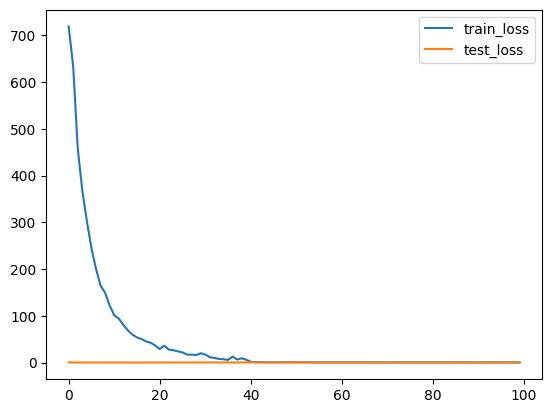

In [11]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])